# **Name** - Abhishek Singh
# **Addmission No.** - 23MS0002
# **Department** - MSc Mathematics & Computing
# **College** - IIT (ISM) Dhanbad, Jharkhand

In [ ]:
# Importing the libraries to read and analyse the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [ ]:
# Reading the csv file of data
data = pd.read_csv('diabetes_dataset.csv')

In [ ]:
# Printing the data
data

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [ ]:
# Size of the data (rows, columns)
data.shape

(768, 8)

# EDA (Exploratory Data Analysis)

In [ ]:
data.sample(5)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
510,84,72,31,0,29.7,0.297,46,1
117,78,48,0,0,33.7,0.654,25,0
690,107,80,0,0,24.6,0.856,34,0
173,79,60,42,48,43.5,0.678,23,0
678,121,52,0,0,36.0,0.127,25,1


In [ ]:
# Description about the data
data.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Information about data storage type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [ ]:
data.nunique(0).sum() # number of unique values in axis=0

1239

In [ ]:
# Checking for duplicates values in dataset
data.duplicated().sum()

0

In [ ]:
# Checking for null values in dataset
data.isnull().sum() # duplicate values are not found in this dataset

,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


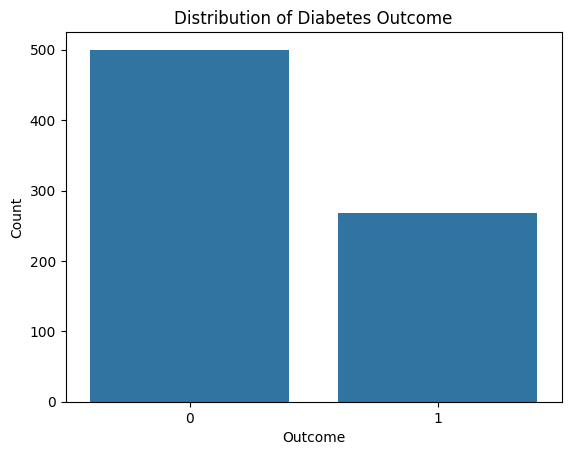

In [ ]:
# Distribution of Target Variable (Outcome):
sns.countplot(x='Outcome', data=data)
plt.title('Distribution of Diabetes Outcome')
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

Univariate Analysis:


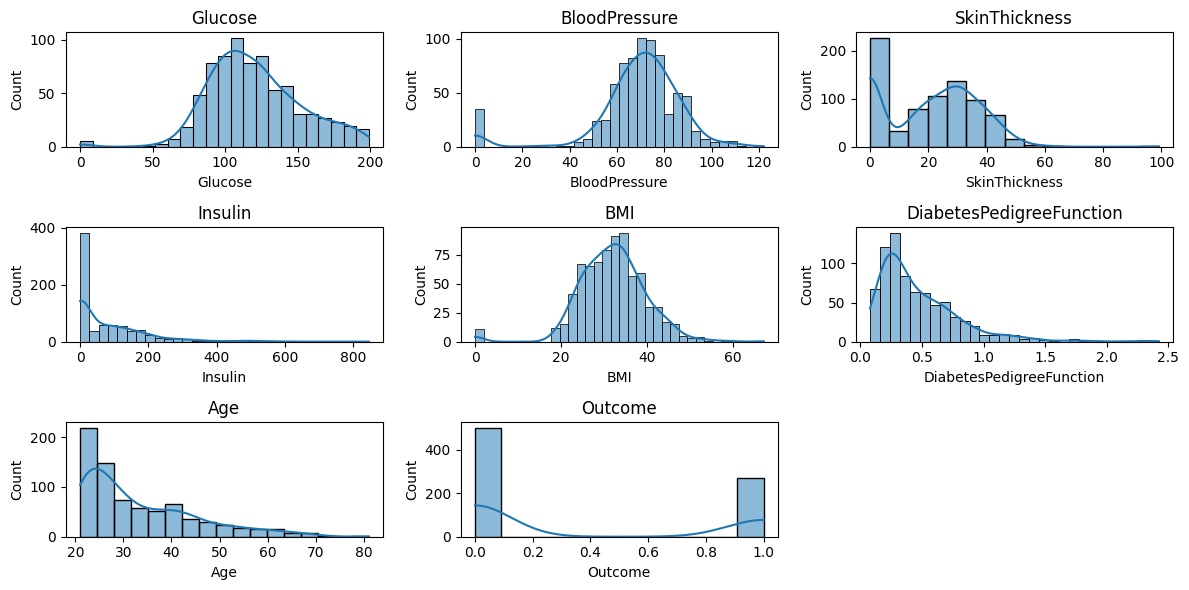

In [ ]:
# Univariate Analysis
print("Univariate Analysis:")
plt.figure(figsize=(12, 6))
for i, column in enumerate(data.columns, 1):
    plt.subplot(3, 3, i)
    if data[column].dtype == 'object':
        sns.countplot(data[column])
    else:
        sns.histplot(data[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

Bivariate Analysis:


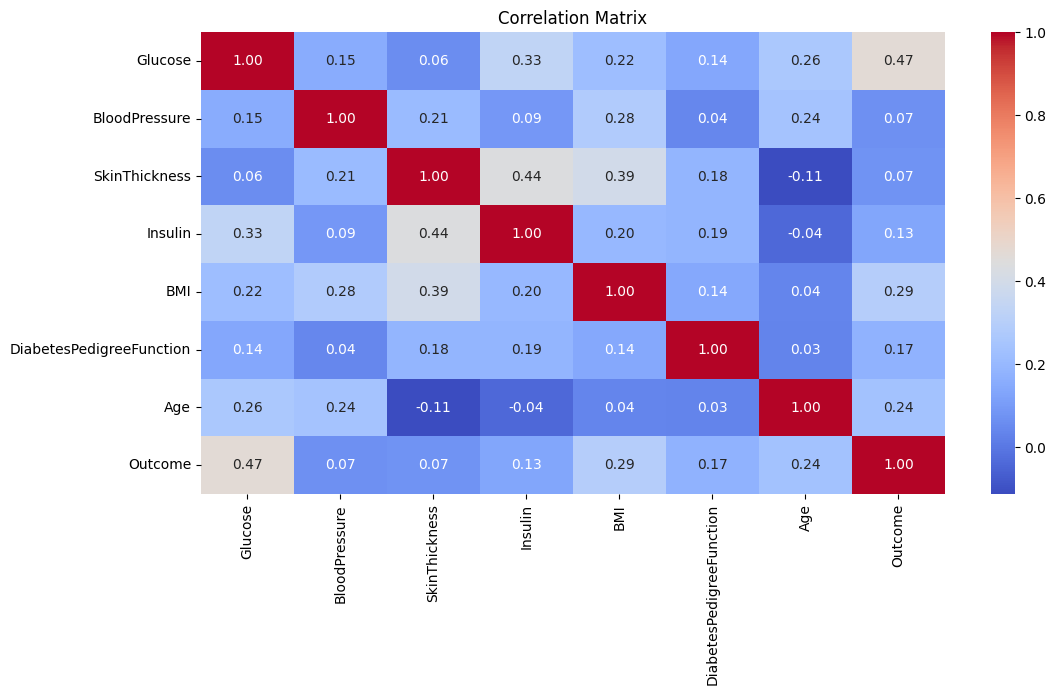

In [ ]:
# Bivariate Analysis - Visualizing the correlation between different features
print("Bivariate Analysis:")
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Pairwise Relationships by Outcome


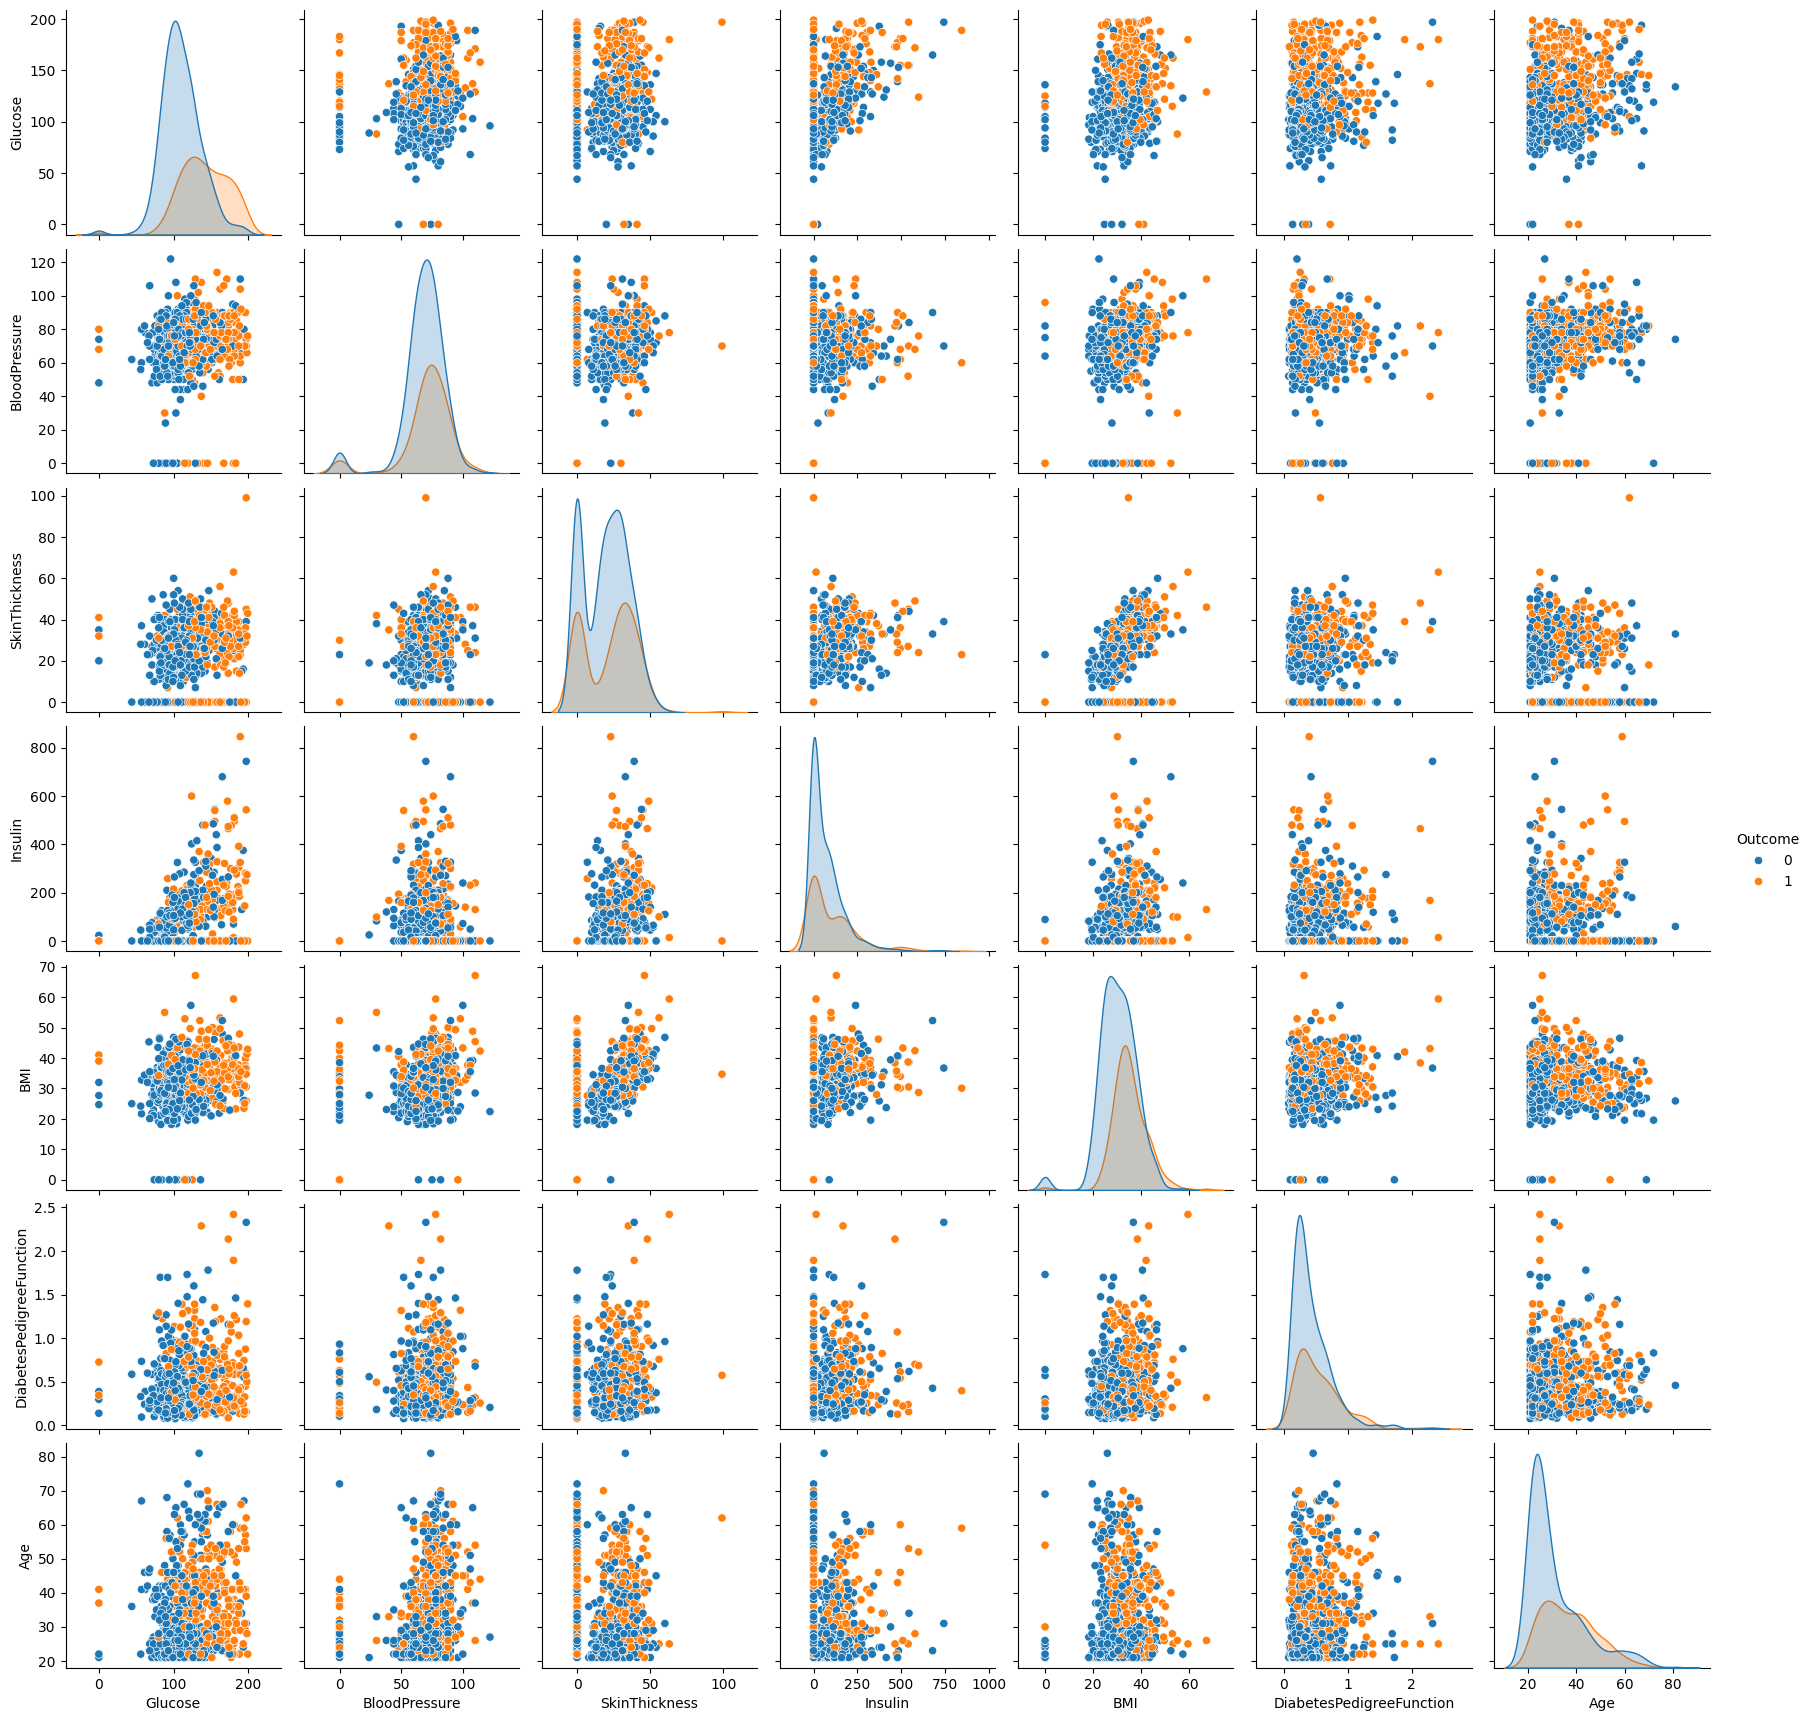

In [ ]:
# Pairwise Relationships:
print('Pairwise Relationships by Outcome')
sns.pairplot(data, hue='Outcome', diag_kind='kde')
plt.show()

### Outliers

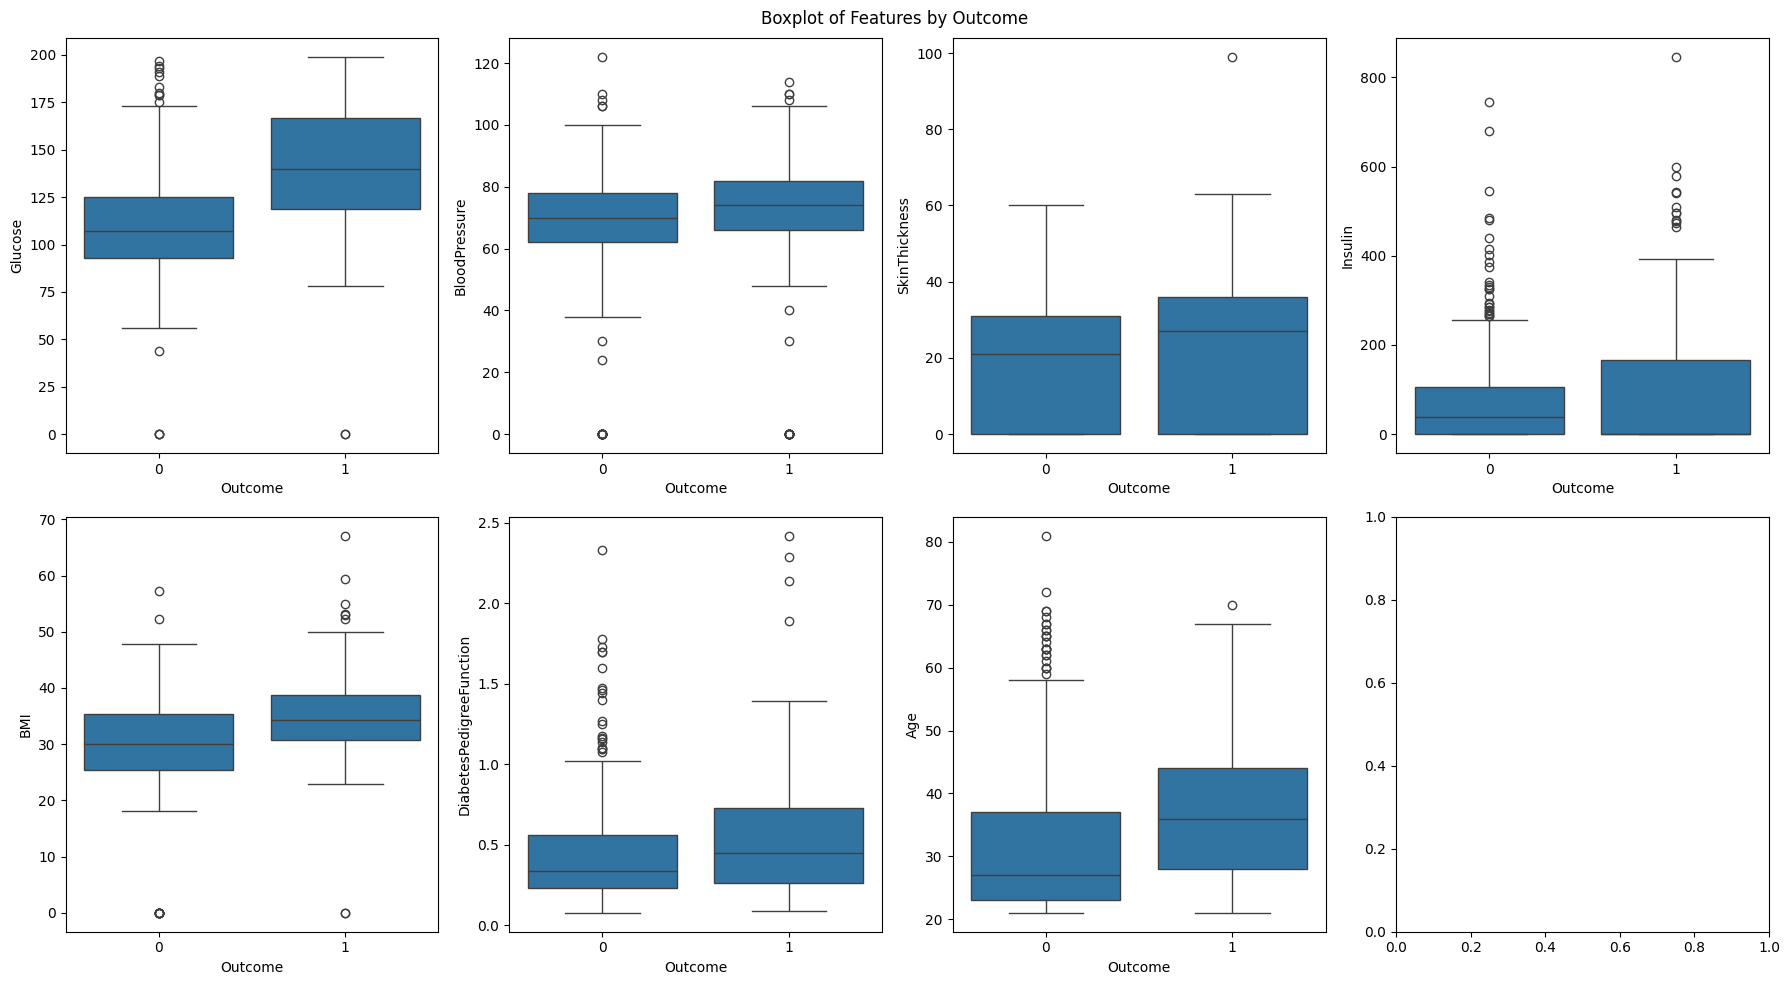

In [ ]:
# Checking Outliers using Boxplot.
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()
for i, col in enumerate(data.columns[:-1]):
    sns.boxplot(x='Outcome', y=col, data=data, ax=axes[i])
plt.suptitle('Boxplot of Features by Outcome')
plt.tight_layout()
plt.show()

### Removing outliers using IQR (Interquartile Range):

In [ ]:
# Removing outliers using IQR (Interquartile Range) based filtering
# Columns That have outliers
outliers = ['Glucose','BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
def remove_outliers_iqr(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]
    return df_cleaned

data = remove_outliers_iqr(data, outliers)

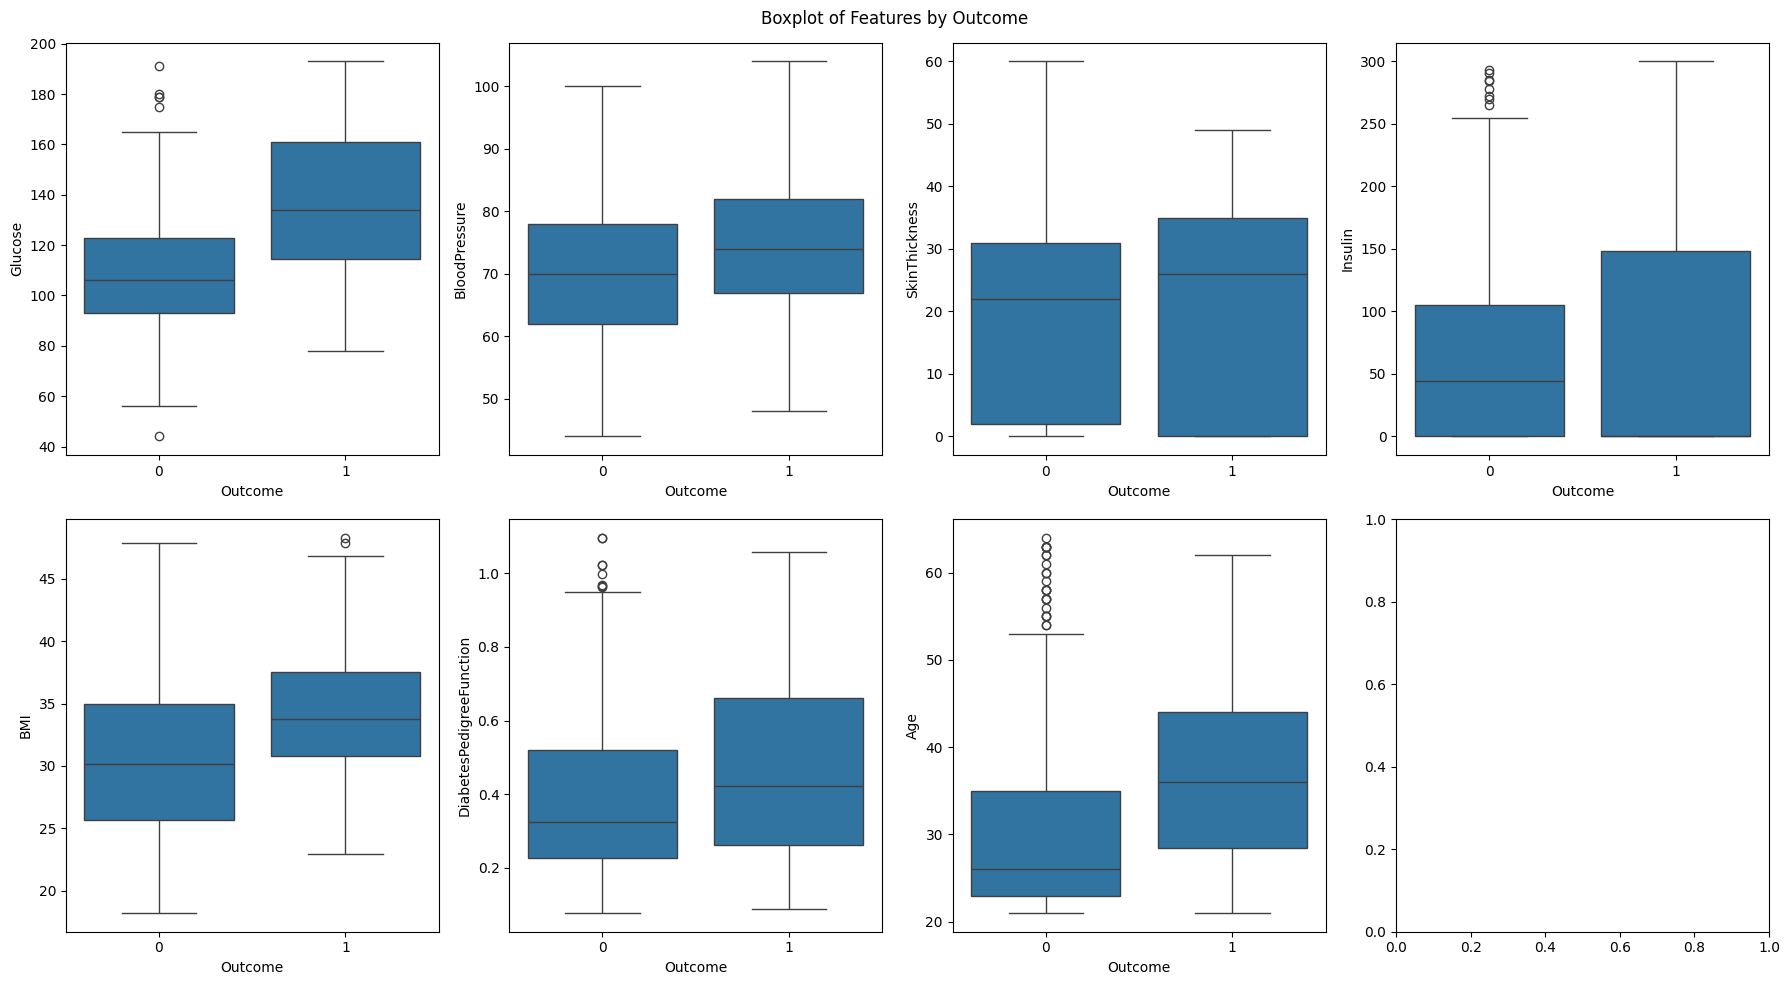

In [ ]:
# Checking Outliers using Boxplot.
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()
for i, col in enumerate(data.columns[:-1]):
    sns.boxplot(x='Outcome', y=col, data=data, ax=axes[i])
plt.suptitle('Boxplot of Features by Outcome')
plt.tight_layout()
plt.show()

# Splitting the dataset in training data and testing data

In [ ]:
x = data.drop('Outcome', axis=1).values
y = data['Outcome'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Normalize the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train, X_test

(array([[0.42211055, 0.        , 0.        , ..., 0.        , 0.09649872,
         0.        ],
        [0.56281407, 0.67213115, 0.38095238, ..., 0.42026826, 0.51409052,
         0.48333333],
        [0.69849246, 0.37704918, 0.3015873 , ..., 0.42771982, 0.24594364,
         0.01666667],
        ...,
        [0.50753769, 0.70491803, 0.58730159, ..., 0.67958271, 0.45175064,
         0.28333333],
        [0.70854271, 0.        , 0.        , ..., 0.6318927 , 0.05422716,
         0.13333333],
        [0.6281407 , 0.78688525, 0.        , ..., 0.33532042, 0.07856533,
         0.        ]]),
 array([[0.49246231, 0.47540984, 0.52380952, ..., 0.50670641, 0.15029889,
         0.36666667],
        [0.56281407, 0.6147541 , 0.50793651, ..., 0.53204173, 0.02988898,
         0.        ],
        [0.54271357, 0.52459016, 0.        , ..., 0.45901639, 0.03415884,
         0.        ],
        ...,
        [0.47738693, 0.59016393, 0.        , ..., 0.54843517, 0.17378309,
         0.6       ],
        [0.7

# **1. Logistic Regression**

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Accuracy of the model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy}')

Logistic Regression Accuracy: 0.7597402597402597


### Confusion matrix

In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{confusion_mat}')

Confusion Matrix:
[[84 15]
 [22 33]]


### AUC

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(f'Area Under the Curve: {auc}')

Area Under the Curve: 0.7242424242424242


# **2. kNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

### Accuracy of the model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'kNN Accuracy: {accuracy}')

kNN Accuracy: 0.7272727272727273


### Confusion Matrix

In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{confusion_mat}')

Confusion Matrix:
[[83 16]
 [26 29]]


### AUC

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(f'Area Under the Curve: {auc}')

Area Under the Curve: 0.6828282828282828


# **3. Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

### Accuracy of the model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy}')

Decision Tree Accuracy: 0.7402597402597403


### Confusion Matrix

In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{confusion_mat}')

Confusion Matrix:
[[72 27]
 [19 36]]


### AUC

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(f'Area Under the Curve: {auc}')

Area Under the Curve: 0.6909090909090909


# **4. Naïve Bayes**
I'll use the **GaussianNB** from *sklearn.naive_bayes* to perform Naïive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

### Accuracy of the model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Naïve Bayes Accuracy: {accuracy}')

Naïve Bayes Accuracy: 0.7597402597402597


### Confusion Matrix

In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{confusion_mat}')

Confusion Matrix:
[[81 18]
 [19 36]]


### AUC

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(f'Area Under the Curve: {auc}')

Area Under the Curve: 0.7363636363636363


# **5. Support Vector Machine (SVM)**
I'll use the **SVC** from *sklearn.svm* to perform SVM classification.

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

### Accuracy of the model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Accuracy: {accuracy}')

SVM Accuracy: 0.7727272727272727


### Confusion Matrix

In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{confusion_mat}')

Confusion Matrix:
[[87 12]
 [23 32]]


### AUC

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(f'Area Under the Curve: {auc}')

Area Under the Curve: 0.7303030303030303


---
---
---
# **Final Report after Comparing the Results**

Comparison of the performance of the different classification algorithms on the diabetes dataset:

## **1. Logistic Regression:**
**Accuracy:** 0.760

**Confusion Matrix:**
```
[[84 15]
 [22 33]]
 ```
**AUC:** 0.724
***
## **2. kNN:**
**Accuracy:** 0.727

**Confusion Matrix:**
```
[[83 16]
 [26 29]]
 ```
**AUC:** 0.683
***
## **3. Decision Tree:**
**Accuracy:** 0.701

**Confusion Matrix:**
```
[[72 27]
 [19 36]]
 ```
**AUC:** 0.691
***
## **4. Naïve Bayes:**
**Accuracy:** 0.760

**Confusion Matrix:**
```
[[81 18]
 [19 36]]
 ```
**AUC:** 0.736
***
## **5. Support Vector Machine:**
**Accuracy:** 0.773

**Confusion Matrix:**
```
[[87 12]
 [23 32]]
 ```
**AUC:** 0.730

***
***

From the results, we observe that **Logistic Regression**, **SVM** and **Naïve Bayes** achieved the **highest** accuracy scores of **0.760**, **0.773** and **760** respectively. However, Naïve Bayes outperformed Logistic Regression slightly in terms of AUC (0.736 vs. 0.724). KNN also performed well with an accuracy of 0.727 and an AUC of 0.683. Decision Tree had a slightly lower accuracy of 0.701 and AUC 0.691. Decision Tree had the lowest accuracy (0.701) and AUC (0.691) among the evaluated algorithms.

## **Conclusion:**
1. SVM emerged as the top-performing algorithm with an accuracy of 0.773 and an AUC of 0.730, making it the recommended choice for classification on this diabetes dataset.
2. Logistic Regression and Naïve Bayes achieved the highest accuracy scores of 0.760.
3. kNN demonstrated slightly lower accuracy compared to other algorithms, with a score of 0.727.
4. Decision Tree showed moderate accuracy with a score of 0.701.
5. AUC scores varied across algorithms, with Naïve Bayes having the highest AUC of 0.736.
6. Logistic Regression, Naïve Bayes, and Support Vector Machine demonstrated competitive performance in terms of both accuracy and AUC.
7. Decision Tree exhibited decent performance but had slightly lower accuracy compared to other algorithms.

Based on these results, **Support Vector Machine** and **Naïve Bayes** could be considered as the top-performing classifiers for the diabetes dataset, while Decision Tree and kNN may further optimized to improve the performance.